In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import optuna

Đọc vào dataframe từ file csv, X307 là file dữ liệu, Y307 là file nhãn

In [2]:
df = pd.read_csv('X307.csv', header = None)
df_label = pd.read_csv('Y307.csv', header=None)

In [3]:
df_label.columns = ['Label']
df

,0,1,2,3,4,5,6,7,8,9,...,85,86,87,88,89,90,91,92,93,94
0,10.8270,0.35209,1.8779,1.72090,1.63950,10.6300,0.39120,2.1126,1.97310,1.92940,...,8.9493,0.24757,5.1565,1.63210,1.5017,10.2300,0.43746,2.2318,0.63638,0.83328
1,0.0000,0.00000,0.0000,0.12230,0.22553,0.0000,0.00000,0.0000,0.12383,0.44131,...,10.1570,0.29842,2.1688,0.82444,1.4201,10.1970,0.35825,2.2816,0.75309,1.40570
2,11.1550,0.54922,1.5066,1.82570,1.50200,11.1520,0.57702,1.5258,1.42680,1.18980,...,11.0740,1.06420,2.3164,1.15610,1.2685,10.9820,1.14000,2.2683,1.26110,1.39360
3,9.1410,1.05370,1.4396,0.79057,1.06410,9.1535,1.19000,1.5890,0.78579,1.19790,...,9.0226,1.40820,1.8233,0.88215,1.4828,9.0888,1.62120,1.8609,1.01560,1.59190
4,0.0000,0.00000,0.0000,0.55356,0.44101,8.9480,0.22434,1.2083,1.45270,1.45500,...,9.1165,0.71282,1.6489,1.21410,1.2405,9.0904,0.79514,1.6803,1.09160,1.06230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,0.0000,0.00000,0.0000,1.10700,1.06180,0.0000,0.00000,0.0000,0.42353,0.28361,...,8.4849,0.75835,2.2831,0.71620,1.1092,8.4365,0.65820,2.2875,0.80040,1.12320
303,11.0550,0.55656,3.1624,2.38580,2.15190,11.2360,0.54290,3.0886,2.34600,2.11160,...,9.9068,0.90138,3.3630,1.15190,1.3317,9.8959,1.03780,3.0990,1.05740,1.19920
304,8.1206,0.40302,1.5974,2.46420,2.03460,0.0000,0.00000,0.0000,1.66920,0.93237,...,8.4021,1.09700,2.0714,2.41230,2.2243,8.0699,0.93007,1.7334,2.40800,2.22630
305,10.8730,0.34423,2.4499,2.60100,2.33080,10.9580,0.35972,2.4267,2.49990,2.18680,...,10.0600,0.72422,3.3742,1.67640,1.8434,9.6468,0.73491,3.2588,1.62260,1.67720


Chọn feature phù hợp, columns_to_drop là các cột xóa đi theo ý muốn

       0        1        3        4        5        6        8        9   \
0  10.827  0.35209  1.72090  1.63950  10.6300  0.39120  1.97310  1.92940   
1   0.000  0.00000  0.12230  0.22553   0.0000  0.00000  0.12383  0.44131   
2  11.155  0.54922  1.82570  1.50200  11.1520  0.57702  1.42680  1.18980   
3   9.141  1.05370  0.79057  1.06410   9.1535  1.19000  0.78579  1.19790   
4   0.000  0.00000  0.55356  0.44101   8.9480  0.22434  1.45270  1.45500   

        10       11  ...        83       84       85       86       88  \
0  10.7810  0.45427  ...  0.357130  0.10351   8.9493  0.24757  1.63210   
1   9.6638  0.24671  ... -0.056674  0.49488  10.1570  0.29842  0.82444   
2  11.0660  0.75666  ...  1.160200  1.44990  11.0740  1.06420  1.15610   
3   9.2163  0.91939  ...  0.441640  1.16370   9.0226  1.40820  0.88215   
4   9.4422  0.22355  ...  1.188000  1.31940   9.1165  0.71282  1.21410   

       89       90       91       93       94  
0  1.5017  10.2300  0.43746  0.63638  0.83328  
1 

<Axes: >

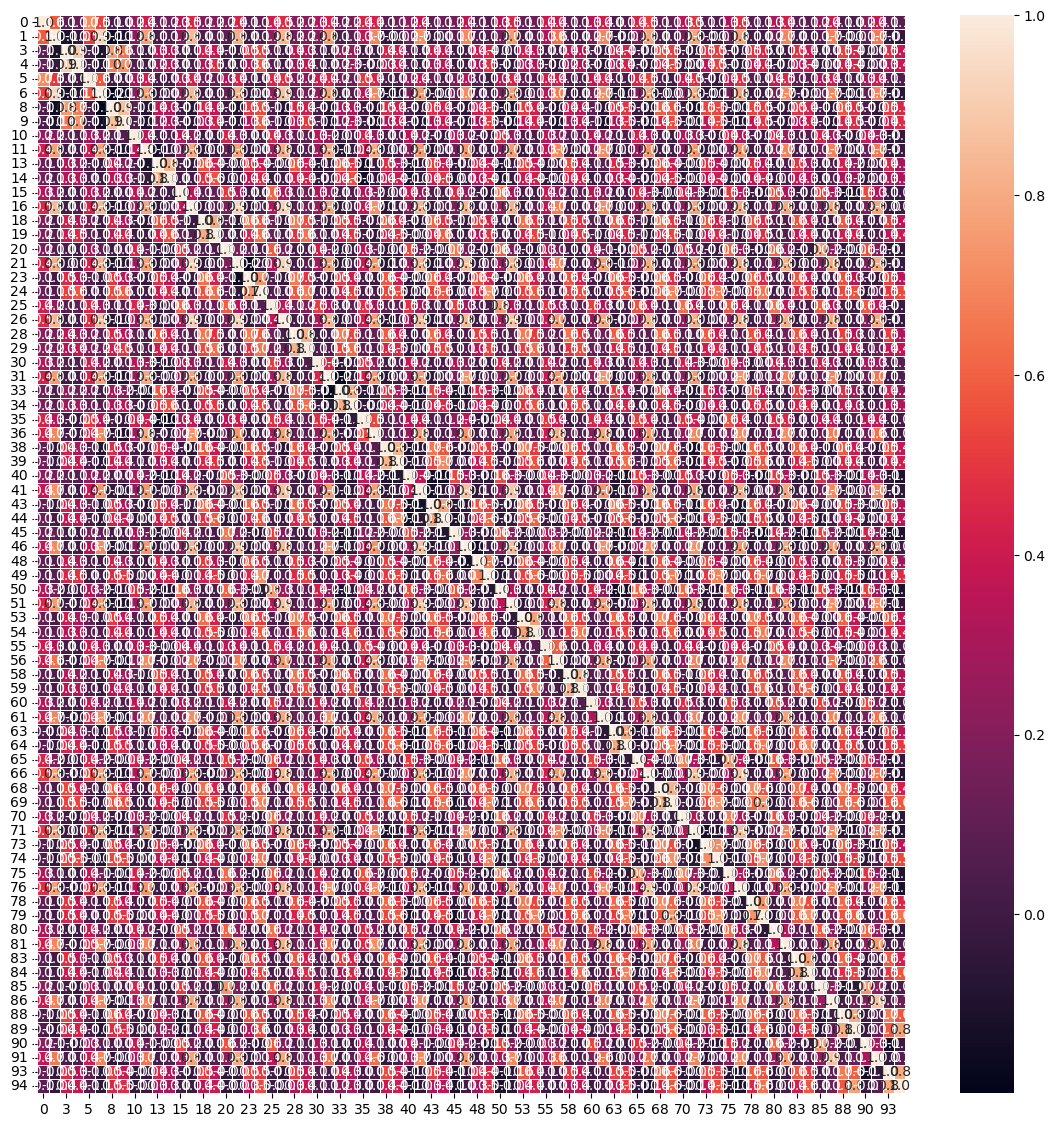

In [4]:
columns_to_drop = []
for i in range(95):
    if i%5==2:
        columns_to_drop.append(i)

# Loại bỏ các cột có chỉ số đã cho từ DataFrame
df_selected = df.drop(df.columns[columns_to_drop], axis=1)

# In ra các dòng đầu tiên của DataFrame đã chọn
print(df_selected.head())
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(df_selected.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [5]:
X = df_selected
y = df_label
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=43)

Sử dụng SMOTE và RandomUnderSampler để cân bằng bộ dữ liệu (cách này tạo ra thêm dữ liệu)
Ra được kết quả tốt hơn với các mô hình hiện tại nhưng chúng em nhận thấy việc tạo thêm và xóa đi dữ liệu không legit lắm, resampling hơi tricky 

In [6]:
print("Kích thước của tập train:", X_train.shape, y_train.shape)
print("Kích thước của tập test:", X_test.shape, y_test.shape)

Kích thước của tập train: (230, 76) (230, 1)
Kích thước của tập test: (77, 76) (77, 1)


Sử dụng random forest cho bộ dữ liệu (cân nhắc dùng class weight ở phần này)

C:\Users\Hi\AppData\Local\Temp\ipykernel_8344\4090858552.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


Accuracy is:  0.7532467532467533
              precision    recall  f1-score   support

           0       0.75      0.92      0.82        48
           1       0.78      0.48      0.60        29

    accuracy                           0.75        77
   macro avg       0.76      0.70      0.71        77
weighted avg       0.76      0.75      0.74        77



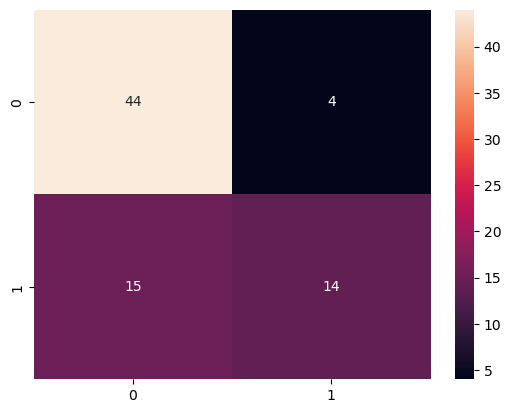

In [7]:
rf_model = RandomForestClassifier(class_weight = 'balanced', random_state=43)
rf_model.fit(X_train, y_train)
y_test_pred = rf_model.predict(X_test)
acc_random_forest = accuracy_score(y_test, rf_model.predict(X_test))
print('Accuracy is: ',acc_random_forest)
cm = confusion_matrix(y_test,rf_model.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")
print(classification_report(y_test, rf_model.predict(X_test)))

Sử dụng optuna để tune ra bộ siêu tham số tối ưu nhất cho mô hình random forest

In [8]:
def objective(trial):
    # Define the hyperparameters to tune
    n_estimators = trial.suggest_int("n_estimators", 100, 1000)
    max_depth = trial.suggest_int("max_depth", 3, 7)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 5)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 5)
    
    # Create a random forest classifier
    clf = RandomForestClassifier(
        n_estimators=n_estimators, 
        max_depth=max_depth,
        min_samples_split=min_samples_split, 
        min_samples_leaf=min_samples_leaf
    )
    # Train the classifier and calculate the accuracy on the validation set
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    
    return 1.0 - score

# Use Optuna to tune the hyperparameters
study = optuna.create_study()
study.optimize(objective, n_trials=100)

# Print the best hyperparameters and the best score
print("Best hyperparameters: ", study.best_params)
print("Best score: ", 1.0 - study.best_value)

# Train the classifier with the best hyperparameters on the full training set
best_params = study.best_params
clf = RandomForestClassifier(
    n_estimators=best_params["n_estimators"], 
    max_depth=best_params["max_depth"],
    min_samples_split=best_params["min_samples_split"], 
    min_samples_leaf=best_params["min_samples_leaf"]
)
clf.fit(X_train, y_train)
# Evaluate the tuned classifier on the test set
score = clf.score(X_test, y_test)
print("Test set accuracy: ", score)

[I 2024-05-29 14:11:58,888] A new study created in memory with name: no-name-29f9ce7e-0600-4fbb-9a08-75436bed802b
C:\Users\Hi\AppData\Local\Temp\ipykernel_8344\979637700.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
[I 2024-05-29 14:11:59,128] Trial 0 finished with value: 0.1558441558441559 and parameters: {'n_estimators': 113, 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.1558441558441559.
C:\Users\Hi\AppData\Local\Temp\ipykernel_8344\979637700.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
[I 2024-05-29 14:12:00,951] Trial 1 finished with value: 0.23376623376623373 and parameters: {'n_estimators': 727, 'max_depth': 7, 'min_samples_split': 4, 'min_samples_

[I 2024-05-29 14:12:18,124] Trial 17 finished with value: 0.22077922077922074 and parameters: {'n_estimators': 826, 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.1558441558441559.
C:\Users\Hi\AppData\Local\Temp\ipykernel_8344\979637700.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
[I 2024-05-29 14:12:18,570] Trial 18 finished with value: 0.24675324675324672 and parameters: {'n_estimators': 201, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.1558441558441559.
C:\Users\Hi\AppData\Local\Temp\ipykernel_8344\979637700.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
[I 2024-05-29 14:12:19,414] Trial 19 finished with v

C:\Users\Hi\AppData\Local\Temp\ipykernel_8344\979637700.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
[I 2024-05-29 14:12:37,518] Trial 35 finished with value: 0.19480519480519476 and parameters: {'n_estimators': 980, 'max_depth': 6, 'min_samples_split': 3, 'min_samples_leaf': 4}. Best is trial 29 with value: 0.1428571428571429.
C:\Users\Hi\AppData\Local\Temp\ipykernel_8344\979637700.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
[I 2024-05-29 14:12:39,583] Trial 36 finished with value: 0.20779220779220775 and parameters: {'n_estimators': 905, 'max_depth': 7, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 29 with value: 0.1428571428571429.
C:\Users\Hi\AppData\Local\Temp\ipykernel_8344\9796

[I 2024-05-29 14:13:07,224] Trial 52 finished with value: 0.20779220779220775 and parameters: {'n_estimators': 598, 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 29 with value: 0.1428571428571429.
C:\Users\Hi\AppData\Local\Temp\ipykernel_8344\979637700.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
[I 2024-05-29 14:13:09,106] Trial 53 finished with value: 0.19480519480519476 and parameters: {'n_estimators': 861, 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 29 with value: 0.1428571428571429.
C:\Users\Hi\AppData\Local\Temp\ipykernel_8344\979637700.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
[I 2024-05-29 14:13:11,315] Trial 54 finished with

C:\Users\Hi\AppData\Local\Temp\ipykernel_8344\979637700.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
[I 2024-05-29 14:13:24,545] Trial 70 finished with value: 0.18181818181818177 and parameters: {'n_estimators': 697, 'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 59 with value: 0.1298701298701299.
C:\Users\Hi\AppData\Local\Temp\ipykernel_8344\979637700.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
[I 2024-05-29 14:13:25,598] Trial 71 finished with value: 0.19480519480519476 and parameters: {'n_estimators': 519, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 5}. Best is trial 59 with value: 0.1298701298701299.
C:\Users\Hi\AppData\Local\Temp\ipykernel_8344\9796

[I 2024-05-29 14:13:48,085] Trial 87 finished with value: 0.19480519480519476 and parameters: {'n_estimators': 769, 'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 59 with value: 0.1298701298701299.
C:\Users\Hi\AppData\Local\Temp\ipykernel_8344\979637700.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
[I 2024-05-29 14:13:49,850] Trial 88 finished with value: 0.18181818181818177 and parameters: {'n_estimators': 812, 'max_depth': 6, 'min_samples_split': 3, 'min_samples_leaf': 5}. Best is trial 59 with value: 0.1298701298701299.
C:\Users\Hi\AppData\Local\Temp\ipykernel_8344\979637700.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
[I 2024-05-29 14:13:51,275] Trial 89 finished with

Best hyperparameters:  {'n_estimators': 137, 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 4}
Best score:  0.8701298701298701
Test set accuracy:  0.7922077922077922


Sử dụng optuna để tune ra bộ siêu tham số tối ưu nhất sau 100 trials với mô hình xgboost (cơ bản giống decision tree nhưng sử dụng gradient boosting để tăng cường độ chính xác của mô hình)

In [9]:
def objective(trial):
    # Define the hyperparameters to tune
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1)
    max_depth = trial.suggest_int("max_depth", 3, 7)
    n_estimators = trial.suggest_int("n_estimators", 100, 1000)
    min_child_weight = trial.suggest_int("min_child_weight", 1, 5)
    
    # Create an XGBoost classifier
    clf = XGBClassifier(
        learning_rate=learning_rate, 
        max_depth=max_depth,
        n_estimators=n_estimators, 
        min_child_weight=min_child_weight
    )
    # Train the classifier and calculate the accuracy on the validation set
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    
    return 1.0 - score

# Use Optuna to tune the hyperparameters
study = optuna.create_study()
study.optimize(objective, n_trials=100)

# Print the best hyperparameters and the best score
print("Best hyperparameters: ", study.best_params)
print("Best score: ", 1.0 - study.best_value)

# Train the classifier with the best hyperparameters on the full training set
best_params = study.best_params
clf = XGBClassifier(
    learning_rate=best_params["learning_rate"], 
    max_depth=best_params["max_depth"],
    n_estimators=best_params["n_estimators"], 
    min_child_weight=best_params["min_child_weight"]
)
clf.fit(X_train, y_train)

# Evaluate the tuned classifier on the test set
score = clf.score(X_test, y_test)
print("Test set accuracy: ", score)

[I 2024-05-29 14:14:06,374] A new study created in memory with name: no-name-30c10d7c-ff16-425b-96e5-d8f096cd4531
[I 2024-05-29 14:14:07,842] Trial 0 finished with value: 0.23376623376623373 and parameters: {'learning_rate': 0.07701426528709666, 'max_depth': 6, 'n_estimators': 700, 'min_child_weight': 1}. Best is trial 0 with value: 0.23376623376623373.
[I 2024-05-29 14:14:08,878] Trial 1 finished with value: 0.20779220779220775 and parameters: {'learning_rate': 0.03909682274401933, 'max_depth': 4, 'n_estimators': 990, 'min_child_weight': 1}. Best is trial 1 with value: 0.20779220779220775.
[I 2024-05-29 14:14:09,510] Trial 2 finished with value: 0.2597402597402597 and parameters: {'learning_rate': 0.04690949500405017, 'max_depth': 7, 'n_estimators': 241, 'min_child_weight': 1}. Best is trial 1 with value: 0.20779220779220775.
[I 2024-05-29 14:14:10,043] Trial 3 finished with value: 0.2727272727272727 and parameters: {'learning_rate': 0.06184916688300649, 'max_depth': 5, 'n_estimators'

[I 2024-05-29 14:14:32,487] Trial 34 finished with value: 0.22077922077922074 and parameters: {'learning_rate': 0.02978042752759875, 'max_depth': 5, 'n_estimators': 312, 'min_child_weight': 2}. Best is trial 24 with value: 0.19480519480519476.
[I 2024-05-29 14:14:32,991] Trial 35 finished with value: 0.23376623376623373 and parameters: {'learning_rate': 0.06482666678936548, 'max_depth': 4, 'n_estimators': 408, 'min_child_weight': 2}. Best is trial 24 with value: 0.19480519480519476.
[I 2024-05-29 14:14:33,346] Trial 36 finished with value: 0.24675324675324672 and parameters: {'learning_rate': 0.021214726852044837, 'max_depth': 5, 'n_estimators': 172, 'min_child_weight': 3}. Best is trial 24 with value: 0.19480519480519476.
[I 2024-05-29 14:14:33,918] Trial 37 finished with value: 0.23376623376623373 and parameters: {'learning_rate': 0.05789118164229985, 'max_depth': 4, 'n_estimators': 489, 'min_child_weight': 2}. Best is trial 24 with value: 0.19480519480519476.
[I 2024-05-29 14:14:34,

[I 2024-05-29 14:15:04,331] Trial 68 finished with value: 0.2727272727272727 and parameters: {'learning_rate': 0.03846777635550693, 'max_depth': 4, 'n_estimators': 640, 'min_child_weight': 3}. Best is trial 24 with value: 0.19480519480519476.
[I 2024-05-29 14:15:05,268] Trial 69 finished with value: 0.19480519480519476 and parameters: {'learning_rate': 0.014500945919651762, 'max_depth': 4, 'n_estimators': 511, 'min_child_weight': 2}. Best is trial 24 with value: 0.19480519480519476.
[I 2024-05-29 14:15:06,168] Trial 70 finished with value: 0.23376623376623373 and parameters: {'learning_rate': 0.03490937026883564, 'max_depth': 4, 'n_estimators': 509, 'min_child_weight': 1}. Best is trial 24 with value: 0.19480519480519476.
[I 2024-05-29 14:15:07,022] Trial 71 finished with value: 0.19480519480519476 and parameters: {'learning_rate': 0.014943771492244748, 'max_depth': 4, 'n_estimators': 438, 'min_child_weight': 2}. Best is trial 24 with value: 0.19480519480519476.
[I 2024-05-29 14:15:07,

Best hyperparameters:  {'learning_rate': 0.014626161414956765, 'max_depth': 4, 'n_estimators': 393, 'min_child_weight': 2}
Best score:  0.8311688311688312
Test set accuracy:  0.8311688311688312


Sử dụng logistic regression cho dữ liệu được xử lý phía trên

Accuracy is:  0.7272727272727273
              precision    recall  f1-score   support

           0       0.78      0.79      0.78        48
           1       0.64      0.62      0.63        29

    accuracy                           0.73        77
   macro avg       0.71      0.71      0.71        77
weighted avg       0.73      0.73      0.73        77



C:\Users\Hi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


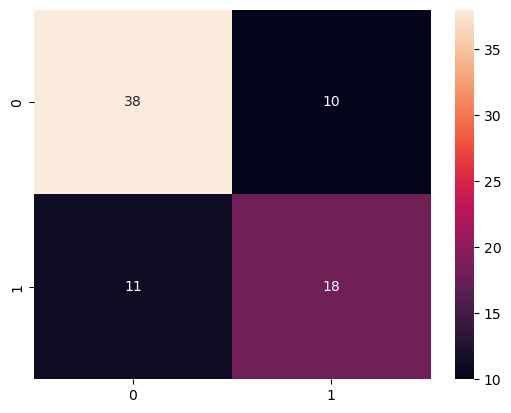

In [10]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
acc_log_reg = accuracy_score(y_test, clf.predict(X_test))
print('Accuracy is: ',acc_log_reg)
cm = confusion_matrix(y_test,clf.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")
print(classification_report(y_test, clf.predict(X_test)))

Sử dụng Support vector machine cho bài toán classification với dữ liệu xử lý ở trên

Accuracy is:  0.6233766233766234
              precision    recall  f1-score   support

           0       0.62      1.00      0.77        48
           1       0.00      0.00      0.00        29

    accuracy                           0.62        77
   macro avg       0.31      0.50      0.38        77
weighted avg       0.39      0.62      0.48        77



C:\Users\Hi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precisio

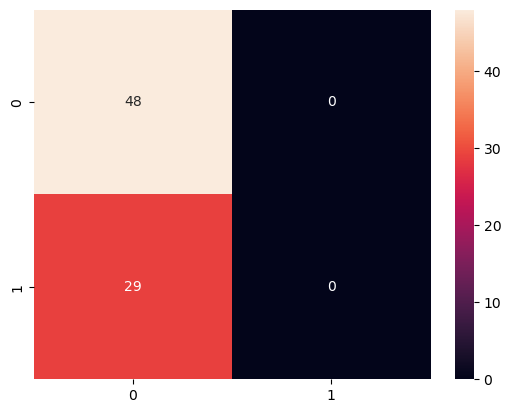

In [11]:
clf = SVC()
clf.fit(X_train, y_train)
acc_svc = accuracy_score(y_test, clf.predict(X_test))
print('Accuracy is: ',acc_svc)
cm = confusion_matrix(y_test,clf.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")
print(classification_report(y_test, clf.predict(X_test)))

Sử dụng Support vector machine tuyến tính cho bài toán classification cho dữ liệu được xử lý trên

C:\Users\Hi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hi\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy is:  0.4805194805194805
              precision    recall  f1-score   support

           0       0.90      0.19      0.31        48
           1       0.42      0.97      0.58        29

    accuracy                           0.48        77
   macro avg       0.66      0.58      0.45        77
weighted avg       0.72      0.48      0.41        77



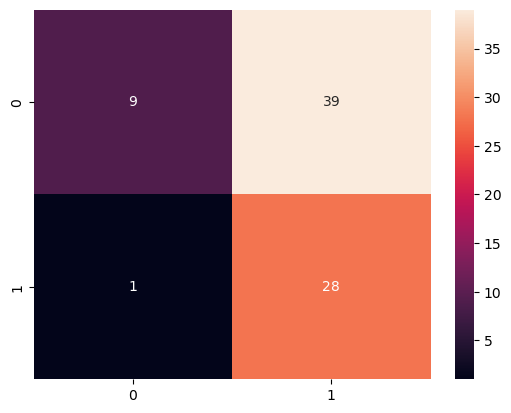

In [12]:
clf = LinearSVC()
clf.fit(X_train, y_train)
acc_linear_svc = accuracy_score(y_test, clf.predict(X_test))
print('Accuracy is: ',acc_linear_svc)
cm = confusion_matrix(y_test,clf.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")
print(classification_report(y_test, clf.predict(X_test)))

Sử dụng mô hình Gaussian Naive Bayes trên bộ dữ liệu đã được xử lý

Accuracy is:  0.6883116883116883
              precision    recall  f1-score   support

           0       0.79      0.69      0.73        48
           1       0.57      0.69      0.62        29

    accuracy                           0.69        77
   macro avg       0.68      0.69      0.68        77
weighted avg       0.71      0.69      0.69        77



C:\Users\Hi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


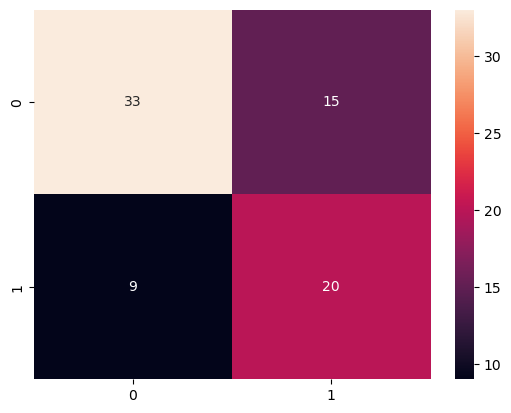

In [13]:
clf = GaussianNB()
clf.fit(X_train, y_train)
acc_gnb = accuracy_score(y_test, clf.predict(X_test))
print('Accuracy is: ',acc_gnb)
cm = confusion_matrix(y_test,clf.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")
print(classification_report(y_test, clf.predict(X_test)))

Sử dụng KNN cho bài toán phân lớp dữ liệu xử lý trên

C:\Users\Hi\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy is:  0.6493506493506493
              precision    recall  f1-score   support

           0       0.76      0.65      0.70        48
           1       0.53      0.66      0.58        29

    accuracy                           0.65        77
   macro avg       0.64      0.65      0.64        77
weighted avg       0.67      0.65      0.65        77



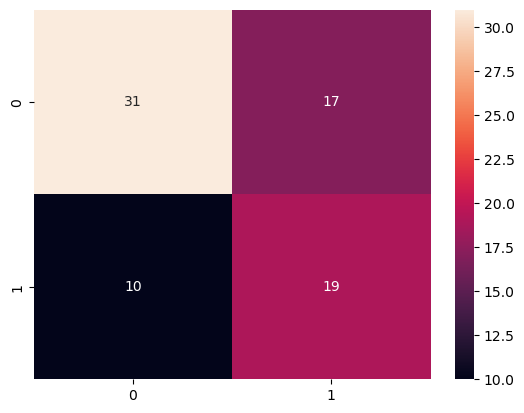

In [14]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
acc_knn = accuracy_score(y_test, clf.predict(X_test))
print('Accuracy is: ',acc_knn)
cm = confusion_matrix(y_test,clf.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")
print(classification_report(y_test, clf.predict(X_test)))

Show ra kết quả các mô hình với score khác nhau

In [15]:
models = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression', 'Support Vector Machines', 'Linear SVC',
              'KNN', 'Naive Bayes'],
    
    'Score': [acc_random_forest, acc_log_reg, acc_svc, acc_linear_svc,
              acc_knn, acc_gnb]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
0,Random Forest,0.753247
1,Logistic Regression,0.727273
5,Naive Bayes,0.688312
4,KNN,0.649351
2,Support Vector Machines,0.623377
3,Linear SVC,0.480519


C:\Users\Hi\AppData\Local\Temp\ipykernel_8344\2712158627.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Accuracy is:  0.7662337662337663
              precision    recall  f1-score   support

           0       0.76      0.92      0.83        48
           1       0.79      0.52      0.62        29

    accuracy                           0.77        77
   macro avg       0.77      0.72      0.73        77
weighted avg       0.77      0.77      0.75        77



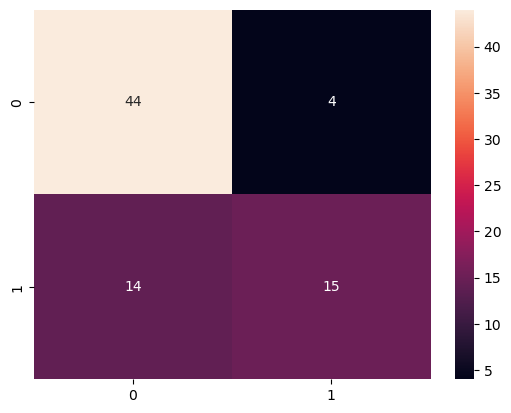

In [16]:
clf = RandomForestClassifier(
    n_estimators=113, 
    max_depth=4,
    min_samples_split=3, 
    min_samples_leaf=3
)
clf.fit(X_train, y_train)
# Evaluate the tuned classifier on the test set
acc_rf = accuracy_score(y_test, clf.predict(X_test))
print('Accuracy is: ',acc_rf)
cm = confusion_matrix(y_test, clf.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

print(classification_report(y_test, clf.predict(X_test)))
#411 4 5 5
#113 4 3 3 

Accuracy is:  0.8181818181818182
              precision    recall  f1-score   support

           0       0.81      0.92      0.86        48
           1       0.83      0.66      0.73        29

    accuracy                           0.82        77
   macro avg       0.82      0.79      0.80        77
weighted avg       0.82      0.82      0.81        77



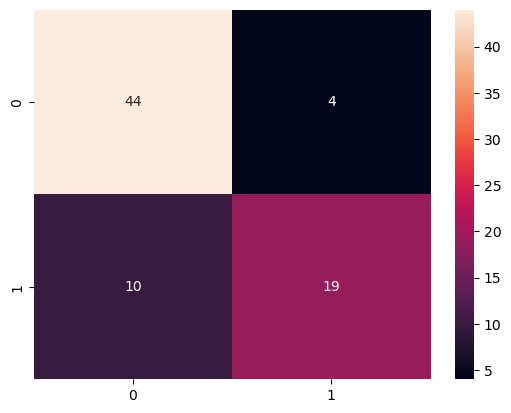

In [17]:
clf = XGBClassifier(
    learning_rate=0.007184072936197817, 
    max_depth=4,
    n_estimators=815, 
    min_child_weight=2
)
clf.fit(X_train, y_train)

# Evaluate the tuned classifier on the test set
acc_xgboost = accuracy_score(y_test, clf.predict(X_test))
print('Accuracy is: ',acc_xgboost)
cm = confusion_matrix(y_test,clf.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

print(classification_report(y_test, clf.predict(X_test)))

Accuracy is:  0.8311688311688312
              precision    recall  f1-score   support

           0       0.82      0.94      0.87        48
           1       0.86      0.66      0.75        29

    accuracy                           0.83        77
   macro avg       0.84      0.80      0.81        77
weighted avg       0.84      0.83      0.83        77



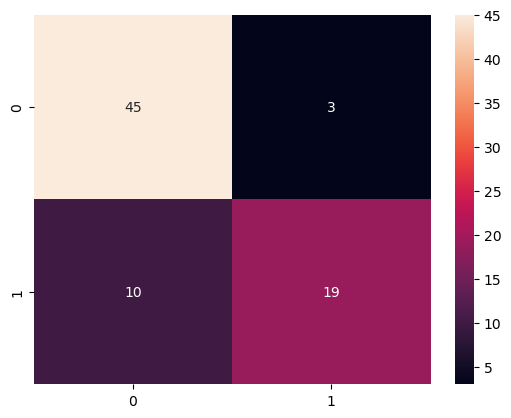

In [23]:
clf = XGBClassifier(
    learning_rate=0.014626161414956765, 
    max_depth=4,
    n_estimators=393, 
    min_child_weight=2
)
clf.fit(X_train, y_train)

# Evaluate the tuned classifier on the test set
acc_xgboost = accuracy_score(y_test, clf.predict(X_test))
print('Accuracy is: ',acc_xgboost)
cm = confusion_matrix(y_test,clf.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

print(classification_report(y_test, clf.predict(X_test)))

Đoạn code này dùng để lưu mô hình vừa học được vào file pickle phục vụ cho việc deploy lên web (giao diện dùng thư viện streamlit)

In [24]:
import pickle 
with open('model.pkl', 'wb') as f:
    pickle.dump(clf, f)